In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

Data files path settings

In [2]:
root_path = "/Users/devasenan/Documents/conser-vision/data/"
# root_path = "C:/Users/devas/Documents/projects/conser-vision/data/"

Read Train features

In [3]:
train_features = pd.read_csv(root_path+"train_features.csv")
train_features.head()

,id,filepath,site
0,ZJ000000,train_features/ZJ000000.jpg,S0120
1,ZJ000001,train_features/ZJ000001.jpg,S0069
2,ZJ000002,train_features/ZJ000002.jpg,S0009
3,ZJ000003,train_features/ZJ000003.jpg,S0008
4,ZJ000004,train_features/ZJ000004.jpg,S0036


In [4]:
train_features.shape

(16488, 3)

In [5]:
size = 128
length = 488


In [6]:
train_imgs = []
train_sites = []

for i in range(length):
    img=cv2.imread(root_path+train_features.iloc[i, 1])
    img = cv2.resize(img, (size, size))
    img = np.array(img).flatten()
    train_imgs.append(img)
    train_sites.append(train_features.iloc[i, 2])
    

In [7]:
train_imgs = np.array(train_imgs)
train_sites = np.array(train_sites)

In [8]:
train_imgs.shape

(488, 49152)

In [9]:
train_imgs = train_imgs/255.0

In [10]:
train_imgs

array([[0.54901961, 0.54901961, 0.54901961, ..., 0.82745098, 0.82745098,
        0.82745098],
       [0.55686275, 0.55686275, 0.55686275, ..., 0.96470588, 0.96470588,
        0.96470588],
       [0.56470588, 0.56470588, 0.56470588, ..., 0.99607843, 0.99607843,
        0.99607843],
       ...,
       [0.23137255, 0.23137255, 0.23137255, ..., 0.90196078, 0.90196078,
        0.90196078],
       [0.34901961, 0.34901961, 0.34901961, ..., 0.81960784, 0.81960784,
        0.81960784],
       [0.09019608, 0.09019608, 0.09019608, ..., 0.82352941, 0.82352941,
        0.82352941]])

Read train labels

In [11]:
train_lbls = pd.read_csv(root_path+"train_labels.csv")
train_lbls = np.array(train_lbls.iloc[:length, 1:])

In [12]:
train_lbls

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [13]:
train_y = []

for i in train_lbls: 
    train_y.append(list(i).index(1))

train_y = np.array(train_y)

Read test features

In [14]:
test_features = pd.read_csv(root_path+"test_features.csv")
test_features.head()

,id,filepath,site
0,ZJ016488,test_features/ZJ016488.jpg,S0082
1,ZJ016489,test_features/ZJ016489.jpg,S0040
2,ZJ016490,test_features/ZJ016490.jpg,S0040
3,ZJ016491,test_features/ZJ016491.jpg,S0041
4,ZJ016492,test_features/ZJ016492.jpg,S0040


In [15]:
test_features.shape

(4464, 3)

In [16]:
test_imgs = []
test_sites = []

for i in range(length):
    img=cv2.imread(root_path+test_features.iloc[i, 1])
    img = cv2.resize(img, (size, size))
    test_imgs.append(img)
    test_sites.append(test_features.iloc[i, 2])


In [17]:
test_imgs = np.array(test_imgs)
test_sites = np.array(test_sites)

In [18]:
test_imgs = test_imgs/255.0

In [19]:
test_imgs.shape

(488, 128, 128, 3)

Feature Extraction

In [20]:
# FEATURE EXTRACTOR function
#input shape is (n, x, y, c) number of images, x, y, and channels
def feature_extractor(dataset):
    x_train =  dataset
    image_dataset = pd.DataFrame()
    for image in range(x_train.shape[0]):  # iterate through each file
        #print(image)
        df = pd.DataFrame()  # Temporary data frame to capture information for e
        #Reset dataframe to blank after each Loop.
        input_img = x_train[image, :]
        img = input_img
        ########
        #START ADDING DATA TO THE DATAFRAME
        #Add feature extractors, e.g. edge detection, smoothing, etc.
        # FEATURE 1 Pixel values
        #Add pixel values to the data frame
        pixel_values = img.reshape(-1)
        df['Pixel_Value'] = pixel_values  # Pixel value itself as a feature
        #df['Image_Name'] = image #Capture image name as we read multiple ima
       
        # FEATURE 2 Bunch of Gabor filter responses
        #Generate Gabor features
        num = 1  # To count numbers up in order to give Gabor features a Lable {
        kernels = []
        for theta in range(2):  # Define number of thetas
            theta = theta / 4. * np.pi
            for sigma in (1, 3):  # Sigma with 1 and
                lamda = np.pi/4
                gamma = 0.5
                gabor_label = 'Gabor' + str(num)  # Label Gabor columns as Gabor
                print(gabor_label)
                ksize = 9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma)
                kernels.append(kernel)
                                        
                fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                # Labels columns as Gabor1, Gabc
                df[gabor_label] = filtered_img
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda)
                num += 1


        image_dataset=image_dataset.append(df)
    return image_dataset

In [21]:
#Extract features from training images
image_features = feature_extractor(train_imgs)
#Reshape to a vector for Random Forest /SVM training
n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=0)
X_for_RF = np.reshape(image_features, (train_imgs.shape[0], -1))

Gabor1
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483
Gabor2
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483
Gabor3
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483
Gabor4
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483
Gabor1
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483
Gabor2
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483
Gabor3
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483
Gabor4
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483
Gabor1
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483
Gabor2
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483
Gabor3
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483
Gabor4
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483
Gabor1
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483
Gabor2
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.785

RandomForest

In [22]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators = 50, random_state = 42)

In [119]:
# n_imgs, img_x, img_y, img_z = train_imgs.shape
# train_imgs_reshaped = train_imgs.reshape(n_imgs, img_x*img_y*img_z)
# train_imgs_reshaped.shape

In [23]:
model.fit(X_for_RF,train_y)

RandomForestClassifier(n_estimators=50, random_state=42)

Predictions

In [122]:
# n_imgs, img_x, img_y, img_z = test_imgs.shape
# test_imgs_reshaped = test_imgs.reshape(n_imgs, img_x*img_y*img_z)
# test_imgs_reshaped.shape

In [32]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
from sklearn import metrics
test_features = feature_extractor(test_imgs)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (test_imgs.shape[0], -1))
#Predict on test
test_prediction = model.predict(test_for_RF)
test_prediction


Gabor1
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483
Gabor2
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483
Gabor3
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483
Gabor4
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483
Gabor1
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483
Gabor2
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483
Gabor3
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483
Gabor4
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483
Gabor1
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483
Gabor2
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483
Gabor3
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483
Gabor4
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483
Gabor1
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483
Gabor2
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.785

array([3, 0, 3, 5, 1, 1, 2, 0, 0, 0, 5, 2, 0, 0, 2, 2, 0, 0, 6, 6, 0, 6,
       0, 5, 2, 2, 3, 0, 7, 0, 7, 5, 7, 2, 3, 6, 5, 5, 1, 7, 2, 0, 2, 7,
       1, 0, 7, 6, 0, 5, 2, 2, 6, 5, 5, 3, 0, 6, 5, 3, 0, 2, 6, 2, 3, 6,
       6, 0, 6, 0, 5, 0, 2, 7, 6, 2, 1, 5, 5, 7, 5, 2, 0, 0, 5, 5, 7, 5,
       6, 5, 0, 2, 1, 6, 1, 0, 7, 5, 2, 2, 7, 6, 0, 1, 6, 0, 7, 5, 2, 6,
       1, 0, 0, 0, 6, 6, 7, 2, 0, 3, 7, 0, 1, 2, 7, 5, 2, 6, 1, 0, 6, 3,
       7, 3, 6, 0, 0, 7, 2, 0, 6, 2, 2, 3, 7, 5, 0, 0, 3, 0, 6, 7, 6, 7,
       7, 0, 2, 6, 0, 3, 2, 3, 7, 6, 5, 6, 0, 1, 0, 2, 5, 2, 0, 3, 6, 0,
       6, 5, 6, 6, 0, 2, 6, 5, 3, 6, 5, 2, 6, 2, 5, 6, 6, 2, 2, 0, 3, 6,
       6, 5, 6, 7, 7, 6, 2, 2, 6, 0, 2, 6, 3, 0, 0, 0, 6, 6, 6, 6, 0, 2,
       7, 0, 0, 2, 0, 0, 3, 7, 5, 5, 5, 6, 6, 6, 0, 7, 2, 6, 6, 0, 3, 0,
       5, 3, 2, 6, 6, 6, 1, 6, 2, 0, 3, 1, 6, 0, 6, 6, 0, 1, 1, 5, 0, 6,
       6, 2, 0, 5, 5, 6, 6, 3, 6, 0, 3, 0, 6, 1, 5, 0, 5, 0, 6, 3, 1, 0,
       5, 2, 3, 5, 5, 0, 5, 2, 5, 6, 6, 5, 7, 2, 0,

In [35]:
test_labels = pd.read_csv(root_path+'submission_format.csv')
test_labels = test_labels.iloc[:length, 1:]
test_labels

test_y = []
for i in range(length):
    test_y.append(np.argmax(test_labels.iloc[i, :]))

test_y = np.array(test_y)


Accuracy =  0.13729508196721313


<AxesSubplot:>

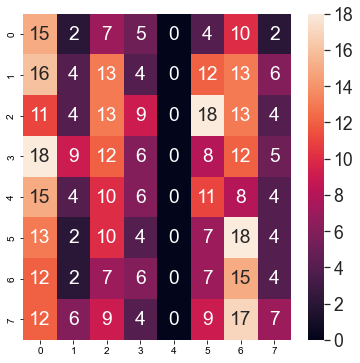

In [38]:
#Print overall accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
print("Accuracy = ", metrics.accuracy_score(test_y, test_prediction))
#Print confusion matrix
cm = confusion_matrix(test_y, test_prediction)
fig, ax = plt.subplots(figsize=(6, 6))  # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)